In [1]:
import antigranular as ag
session = ag.login(<client_id>,<client_secret>, dataset = "Iris Dataset")

Connected to Antigranular server session id: 2035e78e-c59c-4794-bd0c-9080c32e2f90
Cell magic '%%ag' registered successfully, use `%%ag` in a notebook cell to execute your python code on Antigranular private python server


In [2]:
session.session_id

'2035e78e-c59c-4794-bd0c-9080c32e2f90'

In [3]:
%%ag
from ag_utils import load_dataset

data = load_dataset('Iris Dataset')

In [4]:
%%ag
train_x = data['train_x']
train_y = data['train_y']
# data.info()

In [5]:
%%ag
correlation_matrix = train_x.corr(eps=1, numeric_only=True)
from ag_utils import export
export(correlation_matrix, "correlation_matrix")
# export(type(correlation_matrix), "type_correlation_matrix")

Setting up exported variable in local environment: correlation_matrix


<Axes: >

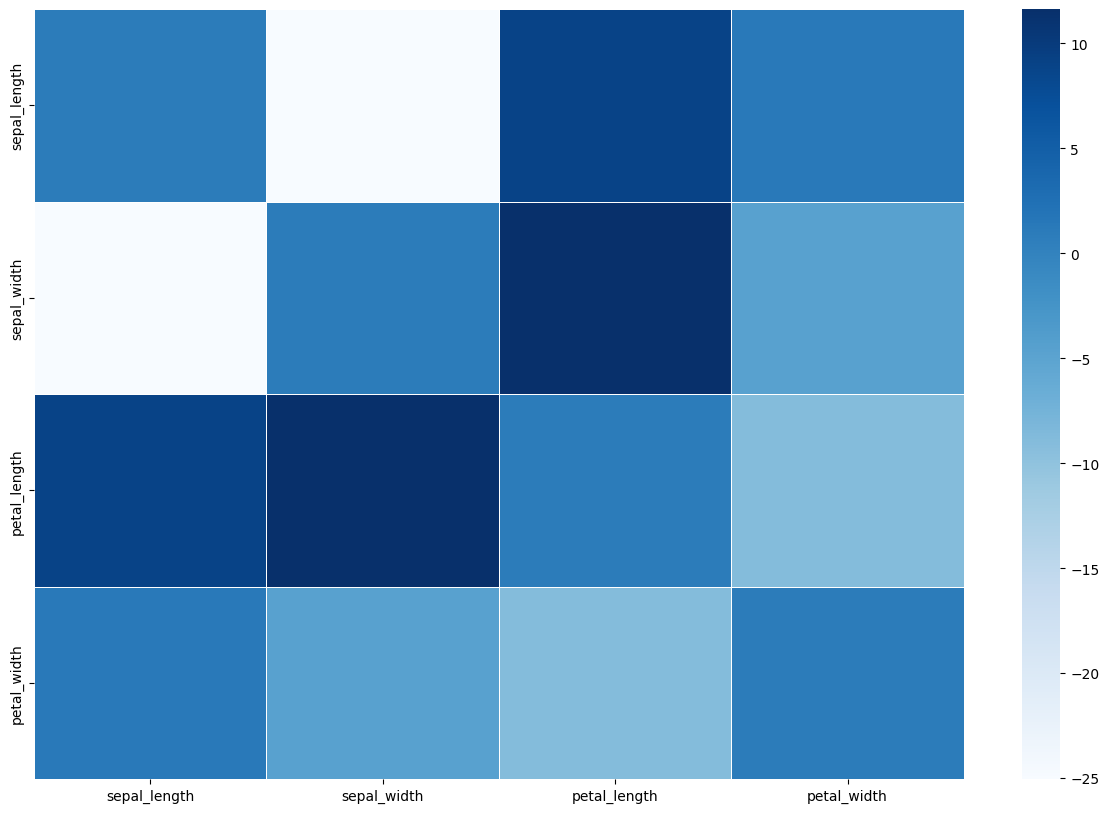

In [6]:
# print(type(correlation_matrix))
# print(type_correlation_matrix)
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
plt.figure(figsize=(15, 10))
correlation_matrix.replace([np.inf, -np.inf], np.nan, inplace=True)
# correlation_matrix.dropna(inplace=True)
sns.heatmap(correlation_matrix, cmap='Blues', linewidths=0.5, fmt='.2f')

<Axes: xlabel='sepal_length', ylabel='sepal_width'>

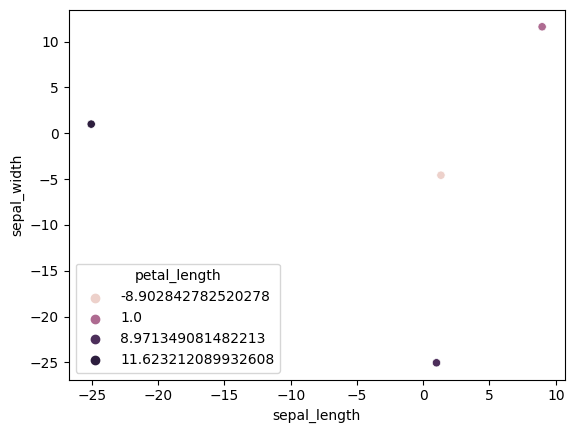

In [7]:
sns.scatterplot(x='sepal_length', y='sepal_width',hue='petal_length', data=correlation_matrix)

In [8]:
%%ag
from op_diffprivlib import models
# RandomForestClassifier(epsilon=0.1, bounds=(2,7),classes=["Iris-setosa", "Iris-versicolor", "Iris-virginica"])
rf = models.GaussianNB(bounds=(0,150))
rf.fit(train_x, train_y)

/usr/local/lib/python3.10/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



In [9]:
%%ag
test_x = data['test_x']

In [10]:
%%ag
y_pred = rf.predict(test_x)

In [13]:
%%ag
from ag_utils import submit_predictions
import pandas as pd
submit_predictions(pd.DataFrame(y_pred))

score: {'leaderboard': 0.02870527337025007, 'logs': {'BIN_ACC': 0.02870527337025007}}



In [14]:
session.privacy_odometer()

{'total_epsilon_used': 20.0, 'total_delta_used': 0.02}